In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\pam\\Desktop\\Hank\\springboard\\Springboard\\second_capstone'

In [4]:
path = 'C:\\Users\\pam\\Desktop\\Hank\\springboard\\Springboard\\second_capstone'

C:\Users\pam\Desktop\Hank\springboard\Springboard\second_capstone


In [5]:
df = pd.read_csv(path+'\\data\\listings.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,225,30,24,2019-03-16,0.18,3,0
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,100,30,9,2018-03-14,0.07,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,95,2,532,2020-03-19,3.90,1,359
3,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,40,1,257,2019-11-03,2.09,1,18
4,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24829,-97.73726,Entire home/apt,99,30,112,2020-03-08,0.88,1,13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11081 entries, 0 to 11080
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11081 non-null  int64  
 1   name                            11081 non-null  object 
 2   host_id                         11081 non-null  int64  
 3   host_name                       11079 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11081 non-null  int64  
 6   latitude                        11081 non-null  float64
 7   longitude                       11081 non-null  float64
 8   room_type                       11081 non-null  object 
 9   price                           11081 non-null  int64  
 10  minimum_nights                  11081 non-null  int64  
 11  number_of_reviews               11081 non-null  int64  
 12  last_review                     

It appears the neighbourhood_group column is just NaN's. This column will be dropped.

In [8]:
del df['neighbourhood_group']

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27750,-97.71398,Entire home/apt,225,30,24,2019-03-16,0.18,3,0
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27577,-97.71379,Private room,100,30,9,2018-03-14,0.07,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26112,-97.73448,Entire home/apt,95,2,532,2020-03-19,3.90,1,359
3,5769,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,40,1,257,2019-11-03,2.09,1,18
4,6413,Gem of a Studio near Downtown,13879,Todd,78704,30.24829,-97.73726,Entire home/apt,99,30,112,2020-03-08,0.88,1,13


The "name" column could also be dropped since it most likely will not factor into determining price.

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [11]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
df.count()

id                                11081
name                              11081
host_id                           11081
host_name                         11079
neighbourhood                     11081
latitude                          11081
longitude                         11081
room_type                         11081
price                             11081
minimum_nights                    11081
number_of_reviews                 11081
last_review                        8529
reviews_per_month                  8529
calculated_host_listings_count    11081
availability_365                  11081
dtype: int64

In [11]:
# We have some missing values, but the variables of interest (price, neighbourhood, latitude, longitude, host_id, and num. of reviews) all
# have the same count.

In [12]:
df.describe()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.108100e+04,1.108100e+04,11081.000000,11081.000000,11081.000000,11081.000000,11081.000000,11081.000000,8529.000000,11081.000000,11081.000000
mean,2.381122e+07,7.645686e+07,78722.340673,30.279036,-97.751716,492.118672,5.722949,30.969046,1.443823,12.661763,126.208465
std,1.338469e+07,8.574531e+07,20.741396,0.058093,0.057206,1516.036233,17.800067,63.384181,1.816038,39.594504,137.418101
min,2.265000e+03,2.300000e+01,78701.000000,30.118850,-98.053550,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.203879e+07,9.217074e+06,78703.000000,30.244480,-97.767760,80.000000,1.000000,1.000000,0.220000,1.000000,0.000000
50%,2.358158e+07,4.004322e+07,78721.000000,30.267280,-97.745150,147.000000,2.000000,6.000000,0.780000,1.000000,82.000000
75%,3.663659e+07,1.174462e+08,78744.000000,30.299950,-97.721290,300.000000,3.000000,31.000000,2.060000,3.000000,256.000000
max,4.345692e+07,3.462766e+08,78759.000000,30.512280,-97.560620,15728.000000,500.000000,951.000000,34.360000,247.000000,365.000000


In [13]:
# May need to convert some of the data to different types.
# Going to drop columns not of interest

df = df[['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',]]

In [14]:
df.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,2265,78702,30.27750,-97.71398,Entire home/apt,225,30
1,5245,78702,30.27577,-97.71379,Private room,100,30
2,5456,78702,30.26112,-97.73448,Entire home/apt,95,2
3,5769,78729,30.45697,-97.78422,Private room,40,1
4,6413,78704,30.24829,-97.73726,Entire home/apt,99,30


In [22]:
# Convert room_type to categorical variable
df['room_type'] = df['room_type'].astype('category')
df.dtypes

id                   int64
neighbourhood        int64
latitude           float64
longitude          float64
room_type         category
price                int64
minimum_nights       int64
dtype: object

In [23]:
df.dtypes

id                   int64
neighbourhood        int64
latitude           float64
longitude          float64
room_type         category
price                int64
minimum_nights       int64
dtype: object

---

## Exploratory Data Analysis

In [24]:
# Histogram of Price

Text(0, 0.5, 'Number of Listings')

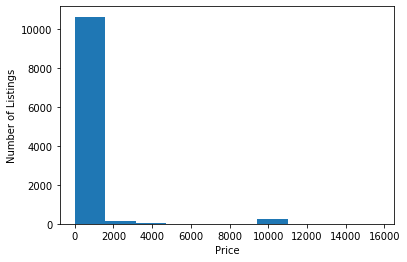

In [27]:
plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Number of Listings')

Most of the Listings are below 2000, but the distribution is right skewed with some outliers around 10000.

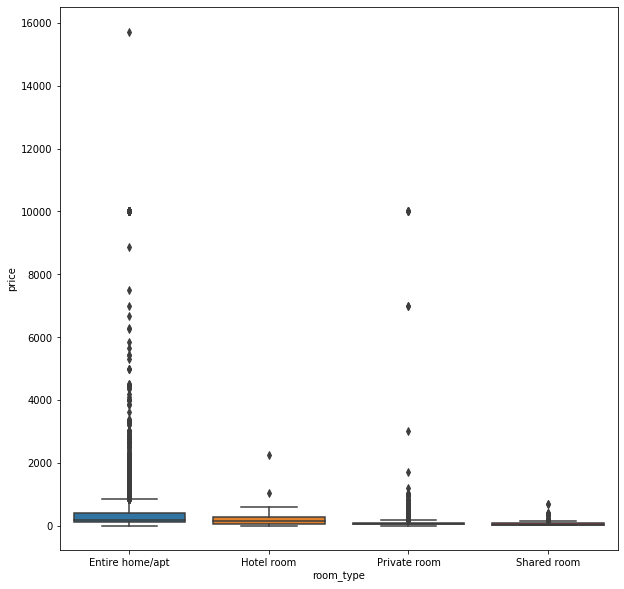

In [35]:
# Boxplot
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='room_type', y='price', data=df, ax=ax)

The figure is hard to comprehend due to the outliers in the Private Room an Entire home/apt categories. From the chart, it appears the Entire home/apt category has the largest IQR.